In [1]:
%run basicOp.py
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None,  warn_bad_lines=True, delim_whitespace=False, delimiter=',')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    df.frequency = df.frequency / 1e6
    #print(df.describe())
    return df

In [3]:
# read r*n samples freq difference for r run
# testlist = range(1, runs+1)
# foldername = 'b_10'
def readFreq(repo, samples=5):  
    FreqSeries = []
    path = './' + repo + '/'
    for i in range(samples):
        filename = 'data' + str(i)
        # print(path + filename + ".csv")
        df = readfile(path + filename + ".csv")
        FreqSeries.append(peakDetect(df))
    #print("mean: %0.4f Mhz, std: %0.4f Mhz" % (np.mean(FreqSeries)/10e6, np.std(FreqSeries)/10e6))
    return FreqSeries

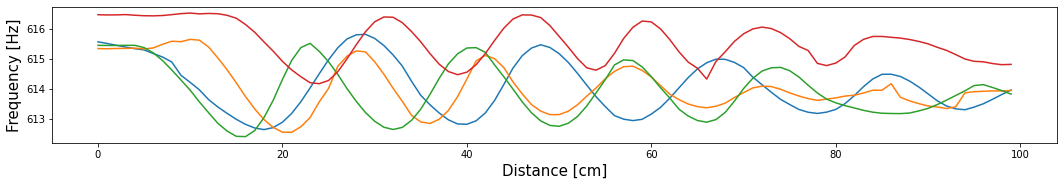

In [5]:
df_3 = readFreq('3mm', samples=100)
df_6 = readFreq('6mm', samples=100)
df_8 = readFreq('8mm', samples=100)
df_10 = readFreq('10mm', samples=100)

from pylab import rcParams
rcParams['figure.figsize'] = 18, 2.5

plt.xlabel("Distance [cm]", fontsize=15)
plt.ylabel("Frequency [Hz]", fontsize=15)
plt.plot(df_3, label='Width 3mm')
plt.plot(df_6, label='Width 6mm')
plt.plot(df_8, label='Width 8mm')
plt.plot(df_10, label='Width 10mm')

plt.savefig("distance.png", bbox_inches='tight')

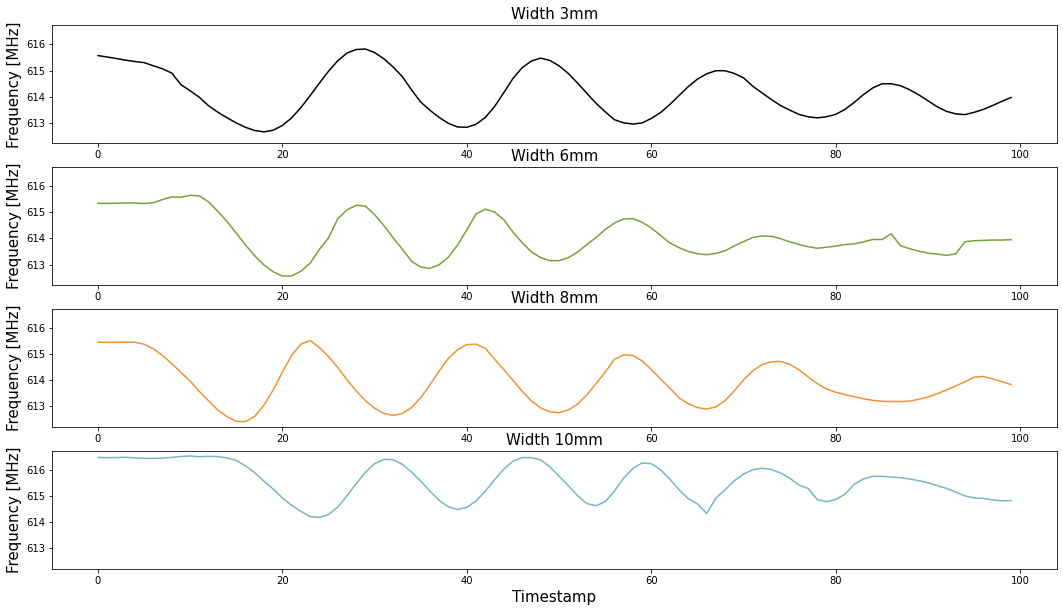

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
fig, ax = plt.subplots(4,1,sharey=True)

width = [3,6,8,10]
colors = ['black', '#77A136', '#EF9136', '#76b5c5']
df = [df_3, df_6, df_8, df_10]
for idx in range(4):
    ax[idx].plot(df[idx], color=colors[idx])
    ax[idx].set_title("Width " + str(width[idx]) + "mm", fontsize=15)
    ax[idx].set_ylabel("Frequency [MHz]", fontsize=15)
    
ax[3].set_xlabel("Timestamp", fontsize=15)
plt.savefig("sweep.png", bbox_inches='tight')